In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Day 4

In [2]:
df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head(5)

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,Company Type,Current fulltime,Job created,Job retain,Effective Date,Total Savings,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,LMEP,NaN,NaN,NaN,03/04/2005,0.00,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,LMEP,NaN,NaN,NaN,04/02/2008,136578.20,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,LMEP,1238.0,NaN,NaN,01/05/2015,302959.40,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,ECSP,25.0,NaN,NaN,02/03/2020,2159.67,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,LMEP,2699.0,NaN,NaN,06/30/2017,922407.32,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


In [6]:
#1. How many different companies are represented in the data set?
df['Company Name'].nunique()

439

In [8]:
#2 What is the total number of jobs created for businesses in Queens?
df[(df['City']=='Queens')]['Job created'].sum()

90.0

In [9]:
#3 How many different unique email domains names are there in the data set?
df[['login','Email domain']] = df["company email"].str.split("@", n = 1, expand = True)

In [11]:
len(df['Email domain'].value_counts())

356

In [12]:
df['Email domain'].nunique()

356

In [35]:
#4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created 
#for each NTA?
NTA_Compnaycount = df.groupby('NTA')['Company Name'].count()
#Count companies for each NTA
df_Comp = pd.DataFrame(NTA_Compnaycount)
#Filter NTAs with more than 4 businesses
df_Gt4 = df_Comp[df_Comp['Company Name'] > 4]
#put in a list NTA's with more than 5 companies 
NTAs = []
for x in df_Gt4.index:
    NTAs.append(x)
NTAs

['Battery Park City-Lower Manhattan',
 'Bushwick South',
 'Carroll Gardens-Columbia Street-Red Hook',
 'College Point',
 'Crown Heights North',
 'DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill',
 'East New York',
 'East Williamsburg',
 'Greenpoint',
 'Hunters Point-Sunnyside-West Maspeth',
 'Hunts Point',
 'Manhattanville',
 'Maspeth',
 'Mott Haven-Port Morris',
 'Queensbridge-Ravenswood-Long Island City',
 'SoHo-TriBeCa-Civic Center-Little Italy',
 'Springfield Gardens South-Brookville',
 'Steinway',
 'Sunset Park West',
 'park-cemetery-etc-Brooklyn']

In [21]:
df_NTAs = df[df['NTA'].isin (NTAs)]

In [23]:
df_NTAs.groupby('NTA').mean('Total Savings')
df_saving = df.groupby('Company Name').mean('Total Savings')
df_saving.rename(columns = {'Total Savings':'Avg Savings'}, inplace = True)
df_saving

,Postcode,Current fulltime,Job created,Job retain,Total Savings,Savings from beginning receiving benefits,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
NTA,,,,,,,,,,,,,
Battery Park City-Lower Manhattan,10042.555556,1241.142857,NaN,NaN,469890.796667,3.798151e+06,40.706939,-74.010275,101.000000,1.000000,175.555556,1.019895e+06,1.000480e+09
Bushwick South,11206.000000,53.500000,10.000000,187.000000,26140.455000,3.078000e+05,40.704505,-73.937341,301.300000,34.000000,475.400000,3.155301e+06,3.030983e+09
Carroll Gardens-Columbia Street-Red Hook,11228.272727,62.454545,NaN,NaN,24337.390000,1.846839e+05,40.679075,-74.005274,306.000000,38.363636,57.727273,3.075696e+06,3.004966e+09
College Point,11355.714286,60.142857,2.000000,462.000000,17159.372857,5.742508e+05,40.782875,-73.848538,407.000000,19.000000,928.428571,4.165605e+06,4.041143e+09
Crown Heights North,11234.555556,7.777778,NaN,NaN,4036.298889,1.716897e+04,40.678727,-73.951528,308.000000,35.222222,305.888889,3.029386e+06,3.011746e+09
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,11202.600000,428.200000,NaN,NaN,59950.340000,4.373905e+05,40.696437,-73.988376,302.000000,33.000000,29.200000,3.032587e+06,3.001219e+09
East New York,11221.222222,118.888889,15.000000,260.000000,48433.093333,4.579454e+05,40.660473,-73.880364,306.444444,41.444444,1097.333333,3.236451e+06,3.047313e+09
East Williamsburg,11221.454545,37.545455,NaN,NaN,13990.626364,1.433695e+05,40.714452,-73.930837,301.000000,34.000000,451.909091,3.135020e+06,3.029257e+09
Greenpoint,11222.000000,109.642857,NaN,NaN,9753.649286,1.772221e+05,40.730675,-73.950186,301.000000,33.000000,574.000000,3.152394e+06,3.025741e+09


## Day 5

In [26]:
## scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings

# Average savegings 
df_saving = df.groupby('Company Name').mean('Total Savings')
df_saving.rename(columns = {'Total Savings':'Avg Savings'}, inplace = True)


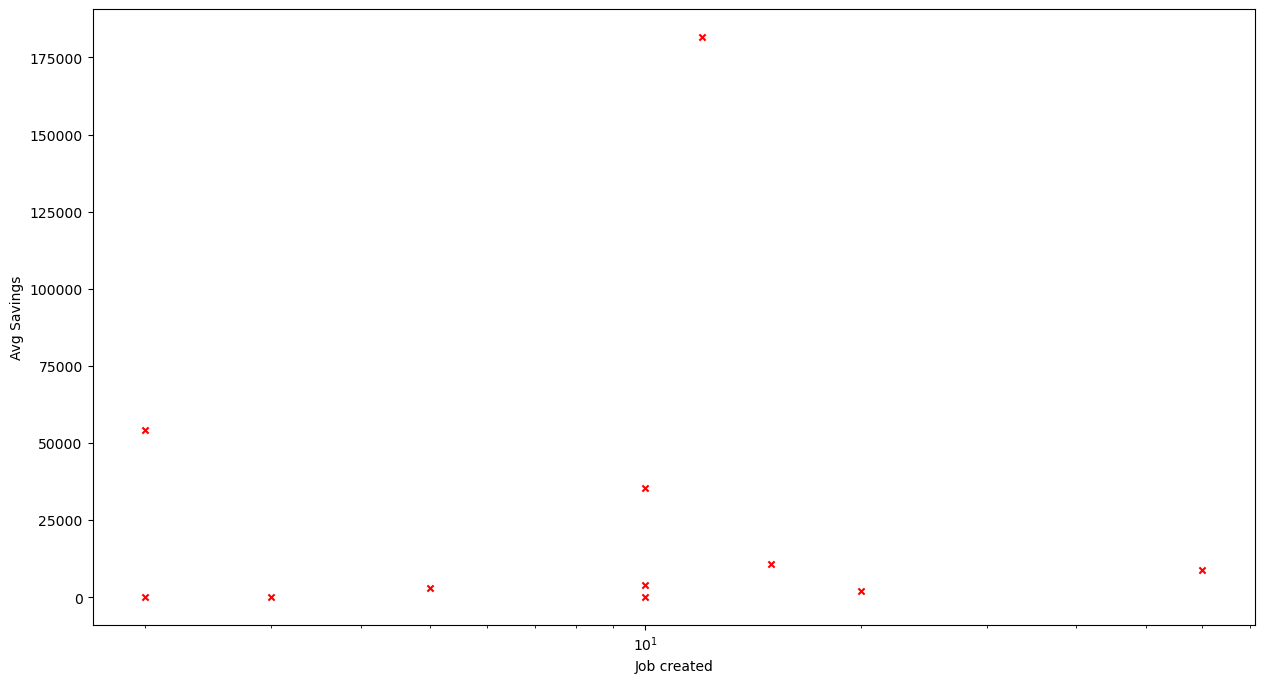

In [27]:
df_saving.plot(kind = "scatter", figsize = (15, 8), y= 'Avg Savings', x= "Job created", c = 'red' , marker = "x", s = 20, colormap = "viridis")
plt.xscale('log')
plt.show()

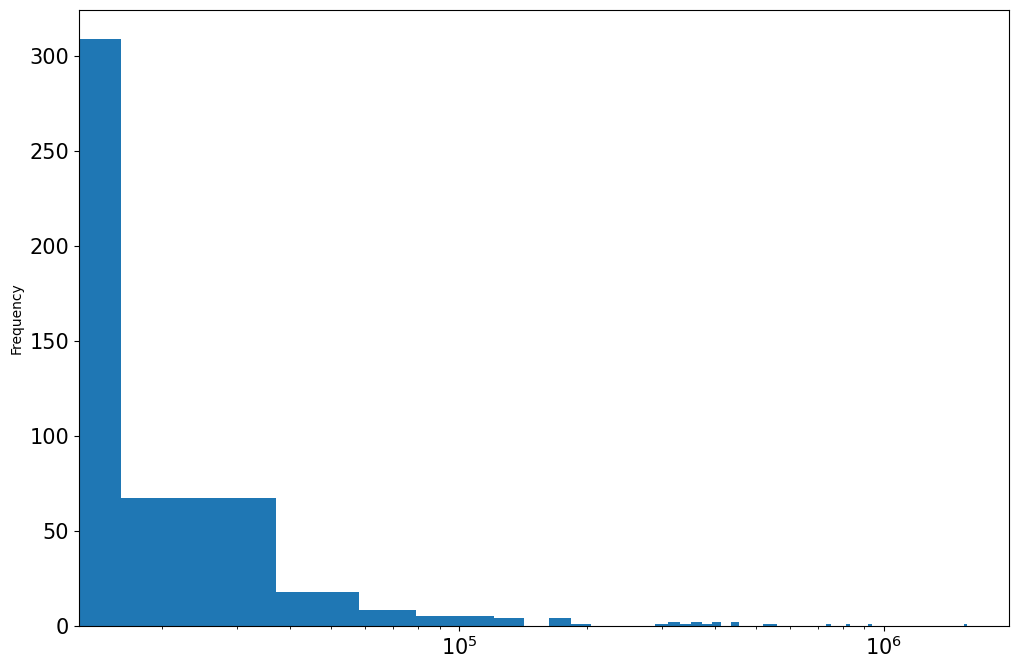

In [31]:
#histogram of the log of the average total savings.
df_saving['Avg Savings'].plot(kind = "hist", figsize = (12, 8), fontsize = 15, bins = 80)
plt.xscale('log')
plt.show()

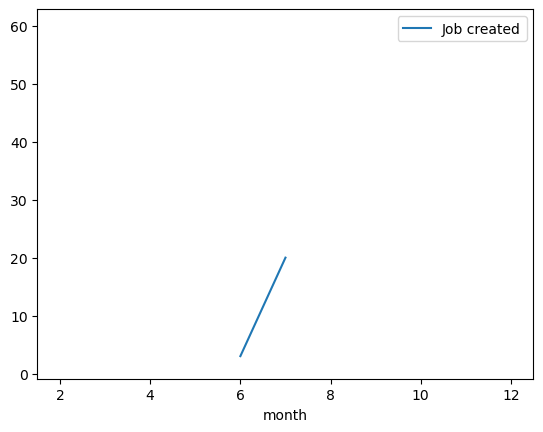

In [33]:
#line plot of the total jobs created for each month.
df['month'] = pd.DatetimeIndex(df['Effective Date']).month
df.plot(kind = "line", x= 'month', y= "Job created")
plt.show()